## Cours sur la Régression Linéaire Polynomiale

### 1. **Introduction à la Régression Linéaire Polynomiale**

La régression linéaire polynomiale est une extension de la régression linéaire classique. Elle permet de modéliser des relations non linéaires entre les variables indépendantes (caractéristiques) et la variable dépendante (cible) en introduisant des puissances de ces variables indépendantes comme nouvelles caractéristiques.

#### **Forme de l'Équation**
L'équation de la régression linéaire polynomiale d'ordre \( n \) est :

\[
y = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n + \epsilon
\]

où :
- \( y \) est la variable dépendante (cible),
- \( x \) est la variable indépendante (caractéristique),
- \( a_0, a_1, a_n \) sont les coefficients,
- \( \epsilon \) est l'erreur résiduelle.

### 2. **Pourquoi utiliser la Régression Polynomiale ?**

La régression linéaire simple peut être limitée lorsqu'il existe une relation non linéaire entre la variable indépendante et la variable dépendante. La régression polynomiale permet de capturer cette non-linéarité en ajoutant des termes quadratiques, cubiques, ou de degrés supérieurs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Analyse des données
df = pd.read_csv("datasets/regression_polynomiale/graph.csv", sep=";")

In [4]:
df

,Year,Land_Annual
0,1880,-0.62
1,1881,-0.41
2,1882,-0.50
3,1883,-0.59
4,1884,-0.86
...,...,...
134,2014,1.03
135,2015,1.32
136,2016,1.48
137,2017,1.38


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         139 non-null    int64  
 1   Land_Annual  139 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [5]:
df.describe()

,Year,Land_Annual
count,139.000000,139.000000
mean,1949.000000,0.078417
std,40.269923,0.502860
min,1880.000000,-0.860000
25%,1914.500000,-0.270000
50%,1949.000000,-0.020000
75%,1983.500000,0.255000
max,2018.000000,1.480000


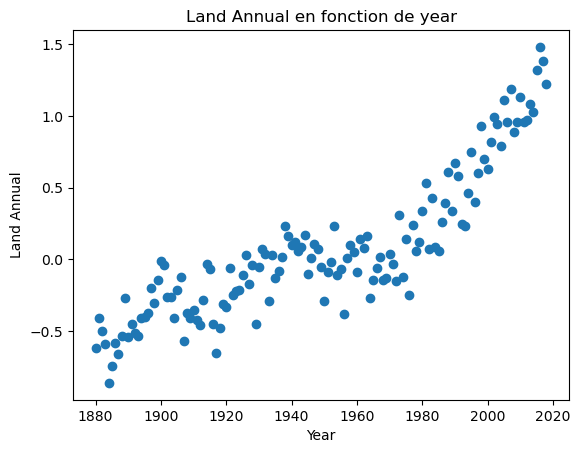

In [6]:
plt.scatter(df['Year'], df['Land_Annual'])
plt.xlabel("Year")
plt.ylabel("Land Annual")
plt.title("Land Annual en fonction de year")
plt.show()

In [7]:
# Extraction de X
X = df[['Year']].values
y = df['Land_Annual']

In [11]:
# Déclaration du modèle linéaire
model_lineaire = LinearRegression()

In [12]:
model_lineaire.fit(X, y)

LinearRegression()

In [13]:
y_linear_pred = model_lineaire.predict(X)

In [15]:
mse = mean_squared_error(y, y_linear_pred)
mse

0.059940964628002615

In [16]:
r2_score_linear = r2_score(y, y_linear_pred)
r2_score_linear

0.7612382660441059

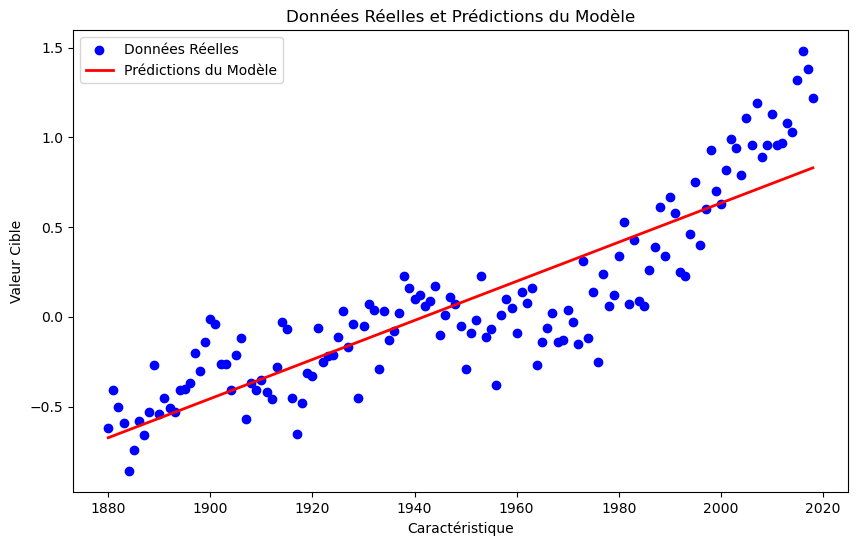

In [17]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les données réelles
plt.scatter(X, y, color='blue', label='Données Réelles')

# Tracer les prédictions du modèle
plt.plot(X, y_linear_pred, color='red', linewidth=2, label='Prédictions du Modèle')

# Ajouter des labels et un titre
plt.xlabel('Caractéristique')
plt.ylabel('Valeur Cible')
plt.title('Données Réelles et Prédictions du Modèle')
plt.legend()

# Afficher le graphique
plt.show()

In [18]:
### Modèle de dégré 2
polynomial_feature_deg2 = PolynomialFeatures(degree=2)

In [20]:
X_poly_deg2 = polynomial_feature_deg2.fit_transform(X)

In [22]:
# Affichage de X
X

array([[1880],
       [1881],
       [1882],
       [1883],
       [1884],
       [1885],
       [1886],
       [1887],
       [1888],
       [1889],
       [1890],
       [1891],
       [1892],
       [1893],
       [1894],
       [1895],
       [1896],
       [1897],
       [1898],
       [1899],
       [1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [19

In [23]:
# La forme de X
X.shape

(139, 1)

In [21]:
# Affichage de X_ploy_deg
X_poly_deg2

array([[1.000000e+00, 1.880000e+03, 3.534400e+06],
       [1.000000e+00, 1.881000e+03, 3.538161e+06],
       [1.000000e+00, 1.882000e+03, 3.541924e+06],
       [1.000000e+00, 1.883000e+03, 3.545689e+06],
       [1.000000e+00, 1.884000e+03, 3.549456e+06],
       [1.000000e+00, 1.885000e+03, 3.553225e+06],
       [1.000000e+00, 1.886000e+03, 3.556996e+06],
       [1.000000e+00, 1.887000e+03, 3.560769e+06],
       [1.000000e+00, 1.888000e+03, 3.564544e+06],
       [1.000000e+00, 1.889000e+03, 3.568321e+06],
       [1.000000e+00, 1.890000e+03, 3.572100e+06],
       [1.000000e+00, 1.891000e+03, 3.575881e+06],
       [1.000000e+00, 1.892000e+03, 3.579664e+06],
       [1.000000e+00, 1.893000e+03, 3.583449e+06],
       [1.000000e+00, 1.894000e+03, 3.587236e+06],
       [1.000000e+00, 1.895000e+03, 3.591025e+06],
       [1.000000e+00, 1.896000e+03, 3.594816e+06],
       [1.000000e+00, 1.897000e+03, 3.598609e+06],
       [1.000000e+00, 1.898000e+03, 3.602404e+06],
       [1.000000e+00, 1.899000e

In [24]:
X_poly_deg2.shape

(139, 3)

In [25]:
# Entrainement du modèle de dégré 2
model_lineaire.fit(X_poly_deg2, y)

LinearRegression()

In [26]:
# La prédiction de notre modèle de dégré
y_pred_deg2 = model_lineaire.predict(X_poly_deg2)

In [28]:
mse = mean_squared_error(y, y_pred_deg2)
mse

0.042741824389510144

In [29]:
r2_score_linear = r2_score(y, y_pred_deg2)
r2_score_linear

0.829747282730411

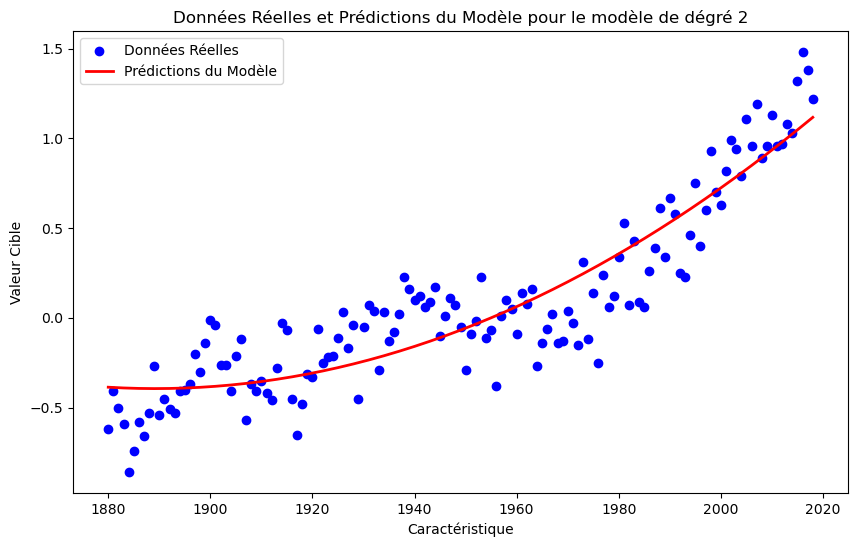

In [30]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les données réelles
plt.scatter(X, y, color='blue', label='Données Réelles')

# Tracer les prédictions du modèle
plt.plot(X, y_pred_deg2, color='red', linewidth=2, label='Prédictions du Modèle')

# Ajouter des labels et un titre
plt.xlabel('Caractéristique')
plt.ylabel('Valeur Cible')
plt.title('Données Réelles et Prédictions du Modèle pour le modèle de dégré 2')
plt.legend()

# Afficher le graphique
plt.show()

### Polynome de dégré 3

In [32]:
### Modèle de dégré 3
polynomial_feature_deg3 = PolynomialFeatures(degree=3)

In [33]:
X_poly_deg3 = polynomial_feature_deg3.fit_transform(X)

In [34]:
# Entrainement du modèle de dégré 3
model_lineaire.fit(X_poly_deg3, y)

LinearRegression()

In [38]:
# La prédiction de notre modèle de dégré 3
y_pred_deg3 = model_lineaire.predict(X_poly_deg3)

In [39]:
mse = mean_squared_error(y, y_pred_deg3)
mse

0.029227927662654123

In [40]:
r2_score_linear = r2_score(y, y_pred_deg3)
r2_score_linear

0.8835769372084381

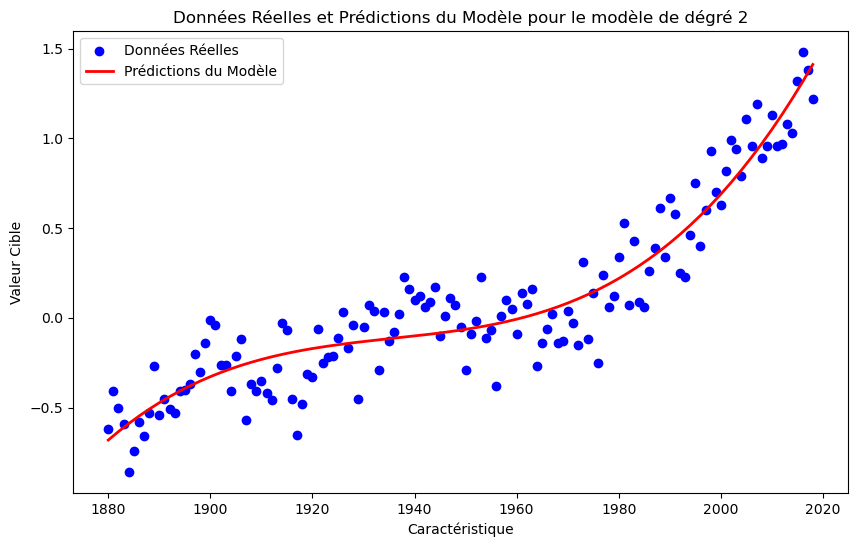

In [41]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les données réelles
plt.scatter(X, y, color='blue', label='Données Réelles')

# Tracer les prédictions du modèle
plt.plot(X, y_pred_deg3, color='red', linewidth=2, label='Prédictions du Modèle')

# Ajouter des labels et un titre
plt.xlabel('Caractéristique')
plt.ylabel('Valeur Cible')
plt.title('Données Réelles et Prédictions du Modèle pour le modèle de dégré 2')
plt.legend()

# Afficher le graphique
plt.show()

### Exercice
- Faire les modèles de dégré 4,5, 6
- Faire la comparaison

### Churubin
- Présentation sur la classification et regression logistique
    - Explique les fondements de la regression logistique
    - Comment ça marche le modèle de regression logistique

### Alexis
- Présentation sur les différents types d'arbres de décisions
    - Explique les fondements des arbres de décisions
    - Comment ça marche le modèle des arbres de décisionse